# CS-513 Final Exam

## Question 2
___
Wyatt Blair

5/6/2024
___


In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

___
## Import Data

In [11]:
data = pd.read_csv('../data/KY_NJ_Zip.csv')
data

,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
0,21,KY,40003,34.48,25.29,14.94,12.64,12.64,0.00,870
1,21,KY,40004,36.60,26.94,14.85,9.59,10.02,1.99,14070
2,21,KY,40006,36.79,25.00,16.51,10.38,10.38,0.94,2120
3,21,KY,40007,41.67,33.33,0.00,25.00,0.00,0.00,120
4,21,KY,40008,36.52,26.40,15.73,10.67,10.67,0.00,1780
...,...,...,...,...,...,...,...,...,...,...
1238,34,NJ,8887,23.88,22.39,19.40,11.94,17.91,4.48,670
1239,34,NJ,8889,23.25,13.63,10.22,9.02,24.85,19.04,4990
1240,34,NJ,8901,50.37,30.12,10.18,3.89,4.21,1.23,18760
1241,34,NJ,8902,29.67,22.66,14.69,10.27,17.09,5.62,20830


In [3]:
data.isnull().any()

STATEFIPS       False
STATE           False
zipcode         False
Returns_pct1    False
Returns_pct2    False
Returns_pct3    False
Returns_pct4    False
Returns_pct5    False
Returns_pct6    False
total           False
dtype: bool

In [4]:
state_map = data[['STATE', 'STATEFIPS']].drop_duplicates()
state_map

,STATE,STATEFIPS
0,KY,21
667,NJ,34


In [5]:
data.drop(columns=['zipcode', 'STATEFIPS', 'total'], inplace=True)     # zipcode isn't useful here and STATE dulpicates STATEFIPS

In [6]:
target = 'STATE'
features = data.columns.to_list(); features.remove(target)

In [7]:
X = data[features].values
y = data[target].values

___
## Problem 2 - (15 points)

The “KY_NJ_Zip” CSV dataset on CANVAS categorizes the percentage of tax returns of families in the states of Kentucky and New Jersey into six categories (Returns_pct1 to Returns_pct6). Use these six categories and Euclidian distance, to perform the following analysis:

* Use the kmeans clustering method to create four clusters for the “KY_NJ_ZIP” dataset.
* Show the cross tabulation of the clusters versus the State.

In [8]:
# clustering model
model = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
unique_labels = np.unique(sorted(model.labels_))

In [12]:
data['cluster'] = model.predict(X)

In [14]:
pd.crosstab(data['STATE'], data['cluster'])

cluster,0,1,2,3
STATE,,,,
KY,260,5,345,57
NJ,41,151,108,276


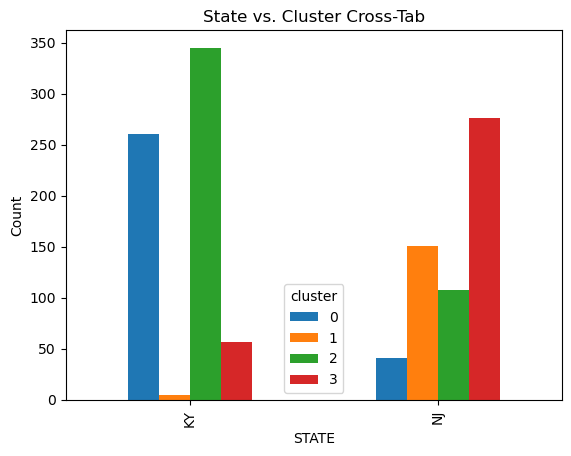

In [20]:
fig, ax = plt.subplots()

ax.set_title('State vs. Cluster Cross-Tab')
ax.set_ylabel('Count')

pd.crosstab(data['STATE'], data['cluster']).plot.bar(ax=ax)

plt.show()